**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>
          Answer) Results on the validation data gives a sense of model's accuracy while tuning the hyperparameters

  >b) What is the difference between mean squared error and mean absolute error?  <br>
          Answer) Large errors have more impact to MSE compared to MAE, therefore MSE is more sensitive to the magnitude of the error.

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>
          Answer) As the output of the function becomes stable, gradient will become very small and the network will not learn,
          which is called the 'vanishing gradient problem'.

>d) What does it mean to overfit your data model?<br>
           Answer) Overfitting means that the model learns every feature of the data, even the noises, so that it perfectly fits the   training data and will not perform well on unseen data.

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>
          Answer) (64 - 2)/2 = 31, the output is of size 6x31x31

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>
          Answer) We have (3x3x3x6) + (1x6) = 168 parameters




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [24]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os
import math

if torch.cuda.is_available():  
    dev = "cuda" 
else:  
    dev = "cpu"  

### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [25]:
class SceneDataset(Dataset):
    # TODO:
    # Define constructor for SceneDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels): #**kwargs): # you are free to change parameters
        self.data = torch.tensor(data, dtype=torch.float, device=dev)
        self.labels = torch.tensor(labels, dtype=torch.float, device=dev)
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
                


In [26]:
print(torch.cuda.is_available())


True


In [42]:
def get_dataset(root):
    # TODO: 
    # Normalize datasets
    images = []
    labels = []
    label = 0
    for root, dirs, files in os.walk(root):
        for dir in dirs:
            directory = "{r}/{d}".format(r=root, d = dir) 
            for root2, dirs2, files2 in os.walk(directory):
                for filename in files2:
                    path = "{r}/{f}/{n}".format(r=root, f=dir, n=filename)
                    image = Image.open(open(path, 'rb'))
                    np_image = np.array(image)/255
                    images.append(np.transpose(np_image))
                    gt = [0,0,0,0]
                    gt[label] = 1
                    labels.append(gt)
            label += 1        
    images = np.array(images, dtype='float64')
    labels = np.array(labels, dtype='float64') 
    train_and_val_dataset_x, test_dataset_x, train_and_val_dataset_y, test_dataset_y = train_test_split(images, labels, test_size=0.2, random_state=1)   
    train_dataset_x, val_dataset_x, train_dataset_y, val_dataset_y = train_test_split(train_and_val_dataset_x, train_and_val_dataset_y, test_size=0.125, random_state=1)
    train_dataset = SceneDataset(train_dataset_x, train_dataset_y)
    test_dataset = SceneDataset(test_dataset_x, test_dataset_y)
    val_dataset = SceneDataset(val_dataset_x, val_dataset_y)
    return train_dataset, val_dataset, test_dataset

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [28]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(4, 8, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(8, 16, 3, stride=1, padding=1)
        self.mp = nn.MaxPool2d(2)
        self.classifier = nn.Linear(7744, 4)
        self.flatten = nn.Flatten()

     
    def forward(self, x): # you can add any additional parameters you want
        x = F.relu(self.conv1(x))
        x = self.mp(F.relu(self.conv2(x)))
        x = self.mp(F.relu(self.conv3(x)))
        flat = self.flatten(x)
        return F.softmax(self.classifier(flat), dim=-1)

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [29]:
#get the dataset
train_dataset, val_dataset, test_dataset = get_dataset("data") 

In [30]:
# HINT: note that your training time should not take more than 2 hours.

max_epoch = 300
train_batch = 128
test_batch = 1
learning_rate = 1e-2 #try learning rate from the interval [1e-1, 1e-4]

#use_gpu = torch.cuda.is_available()
best_path = "best_cnn_sgd.pth"
# Create train dataset loader
train_loader = DataLoader(train_dataset, batch_size=train_batch) #batch size 1 for sgd
# Create validation dataset loader
val_loader = DataLoader(val_dataset, batch_size=train_batch) #batch size 1 for sgd
# Create test dataset loader
test_loader = DataLoader(test_dataset, batch_size=test_batch) #batch size 1 for sgd
# initialize your network
model = ConvNet()
device = torch.device(dev)
model = model.to(device)
# define your loss function
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters 
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
tr_losses=[]
tr_accuracies=[]
val_losses=[]
val_accuracies=[]
i = 1
min_loss = np.inf
for epoch in range(max_epoch):
    model=model.train()
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    for batch in train_loader:
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        pred = y_pred.data.max(1, keepdim=True)[1]
        gt = y_batch.data.max(1, keepdim=True)[1]
        #print("pred:", pred, ", gt:", gt)
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        epoch_losses.append(loss.item())
    accuracy = (correct.item()/len(train_loader.dataset))
    tr_accuracies.append(accuracy)
    avg_loss = np.mean(epoch_losses)
    tr_losses.append(avg_loss)
    print(i,") Training: loss:", avg_loss, ", accuracy:", accuracy)
    i += 1

    #    Validation
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    model = model.eval()
    with torch.no_grad():
        for batch in val_loader:
            x_batch = batch[0].to(device)
            y_batch = batch[1].to(device)
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            pred = y_pred.data.max(1, keepdim=True)[1]
            gt = y_batch.data.max(1, keepdim=True)[1]
            #print("pred:", pred, ", gt:", gt)
            correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
            epoch_losses.append(loss.item())
        accuracy = (correct.item()/len(val_loader.dataset))
        val_accuracies.append(accuracy)    
        avg_loss = np.mean(epoch_losses)    
        val_losses.append(avg_loss)
        print("Validation: loss:", avg_loss, ", accuracy:", accuracy)
        if avg_loss < min_loss:
            torch.save(model, best_path)
            min_loss = avg_loss
            print("New min loss:", min_loss)


1 ) Training: loss: 1.3861266352913597 , accuracy: 0.24942857142857142
Validation: loss: 1.3859402239322662 , accuracy: 0.246
New min loss: 1.3859402239322662
2 ) Training: loss: 1.3855807087638161 , accuracy: 0.3667142857142857
Validation: loss: 1.3852751553058624 , accuracy: 0.39
New min loss: 1.3852751553058624
3 ) Training: loss: 1.384870836951516 , accuracy: 0.3167142857142857
Validation: loss: 1.3843646347522736 , accuracy: 0.255
New min loss: 1.3843646347522736
4 ) Training: loss: 1.3837752190503207 , accuracy: 0.2612857142857143
Validation: loss: 1.3829139322042465 , accuracy: 0.253
New min loss: 1.3829139322042465
5 ) Training: loss: 1.3818739956075494 , accuracy: 0.262
Validation: loss: 1.380261406302452 , accuracy: 0.259
New min loss: 1.380261406302452
6 ) Training: loss: 1.3780014103109186 , accuracy: 0.2792857142857143
Validation: loss: 1.3743769079446793 , accuracy: 0.283
New min loss: 1.3743769079446793
7 ) Training: loss: 1.368502502007918 , accuracy: 0.3295714285714285

54 ) Training: loss: 1.0580732280557805 , accuracy: 0.6807142857142857
Validation: loss: 1.0669015944004059 , accuracy: 0.668
New min loss: 1.0669015944004059
55 ) Training: loss: 1.0572399312799627 , accuracy: 0.6812857142857143
Validation: loss: 1.0661472529172897 , accuracy: 0.669
New min loss: 1.0661472529172897
56 ) Training: loss: 1.056412236257033 , accuracy: 0.6822857142857143
Validation: loss: 1.0654203593730927 , accuracy: 0.671
New min loss: 1.0654203593730927
57 ) Training: loss: 1.055605667287653 , accuracy: 0.6834285714285714
Validation: loss: 1.0646830201148987 , accuracy: 0.672
New min loss: 1.0646830201148987
58 ) Training: loss: 1.0548101793635976 , accuracy: 0.6844285714285714
Validation: loss: 1.0639286488294601 , accuracy: 0.671
New min loss: 1.0639286488294601
59 ) Training: loss: 1.0540220434015448 , accuracy: 0.685
Validation: loss: 1.0631804466247559 , accuracy: 0.67
New min loss: 1.0631804466247559
60 ) Training: loss: 1.0532354972579263 , accuracy: 0.68585714

107 ) Training: loss: 0.9947688752954656 , accuracy: 0.751
Validation: loss: 1.011306531727314 , accuracy: 0.726
New min loss: 1.011306531727314
108 ) Training: loss: 0.9937663793563842 , accuracy: 0.7522857142857143
Validation: loss: 1.0105990767478943 , accuracy: 0.725
New min loss: 1.0105990767478943
109 ) Training: loss: 0.9927439592101357 , accuracy: 0.7531428571428571
Validation: loss: 1.009976089000702 , accuracy: 0.726
New min loss: 1.009976089000702
110 ) Training: loss: 0.9917670239101757 , accuracy: 0.7544285714285714
Validation: loss: 1.0095689445734024 , accuracy: 0.726
New min loss: 1.0095689445734024
111 ) Training: loss: 0.9908423033627597 , accuracy: 0.755
Validation: loss: 1.0090797618031502 , accuracy: 0.726
New min loss: 1.0090797618031502
112 ) Training: loss: 0.9899144107645208 , accuracy: 0.7555714285714286
Validation: loss: 1.008830040693283 , accuracy: 0.73
New min loss: 1.008830040693283
113 ) Training: loss: 0.989085725220767 , accuracy: 0.7571428571428571
Va

162 ) Training: loss: 0.9608332547274503 , accuracy: 0.7861428571428571
Validation: loss: 0.984900526702404 , accuracy: 0.754
163 ) Training: loss: 0.9604434230110862 , accuracy: 0.7864285714285715
Validation: loss: 0.9837164878845215 , accuracy: 0.756
New min loss: 0.9837164878845215
164 ) Training: loss: 0.9599592133001847 , accuracy: 0.787
Validation: loss: 0.9837033450603485 , accuracy: 0.756
New min loss: 0.9837033450603485
165 ) Training: loss: 0.959550107609142 , accuracy: 0.7874285714285715
Validation: loss: 0.9838902652263641 , accuracy: 0.755
166 ) Training: loss: 0.9591830318624323 , accuracy: 0.7874285714285715
Validation: loss: 0.9829632118344307 , accuracy: 0.758
New min loss: 0.9829632118344307
167 ) Training: loss: 0.9587474443695762 , accuracy: 0.7884285714285715
Validation: loss: 0.9832620769739151 , accuracy: 0.755
168 ) Training: loss: 0.9584137732332403 , accuracy: 0.79
Validation: loss: 0.9827674329280853 , accuracy: 0.757
New min loss: 0.9827674329280853
169 ) Tr

225 ) Training: loss: 0.9389621290293607 , accuracy: 0.8102857142857143
Validation: loss: 0.9800456389784813 , accuracy: 0.757
226 ) Training: loss: 0.9393357146870006 , accuracy: 0.8078571428571428
Validation: loss: 0.9954699873924255 , accuracy: 0.744
227 ) Training: loss: 0.939192778413946 , accuracy: 0.8085714285714286
Validation: loss: 0.9878449887037277 , accuracy: 0.746
228 ) Training: loss: 0.9378655184398997 , accuracy: 0.8108571428571428
Validation: loss: 0.9807873964309692 , accuracy: 0.754
229 ) Training: loss: 0.9377633105624806 , accuracy: 0.8104285714285714
Validation: loss: 0.9870016649365425 , accuracy: 0.746
230 ) Training: loss: 0.9371191404082558 , accuracy: 0.8105714285714286
Validation: loss: 0.9917815774679184 , accuracy: 0.744
231 ) Training: loss: 0.9379108797420155 , accuracy: 0.8108571428571428
Validation: loss: 0.9902576133608818 , accuracy: 0.749
232 ) Training: loss: 0.9375373753634366 , accuracy: 0.811
Validation: loss: 0.9784493967890739 , accuracy: 0.76

290 ) Training: loss: 0.9195899551564997 , accuracy: 0.831
Validation: loss: 0.9881294071674347 , accuracy: 0.744
291 ) Training: loss: 0.920532518083399 , accuracy: 0.8281428571428572
Validation: loss: 0.985688641667366 , accuracy: 0.749
292 ) Training: loss: 0.9195175474340266 , accuracy: 0.8314285714285714
Validation: loss: 0.9833519756793976 , accuracy: 0.754
293 ) Training: loss: 0.918771598555825 , accuracy: 0.832
Validation: loss: 0.9862919822335243 , accuracy: 0.749
294 ) Training: loss: 0.9172652678056197 , accuracy: 0.8332857142857143
Validation: loss: 0.9832988008856773 , accuracy: 0.754
295 ) Training: loss: 0.9193946090611544 , accuracy: 0.8312857142857143
Validation: loss: 0.9754425883293152 , accuracy: 0.765
New min loss: 0.9754425883293152
296 ) Training: loss: 0.9173809506676414 , accuracy: 0.8317142857142857
Validation: loss: 0.9919246062636375 , accuracy: 0.741
297 ) Training: loss: 0.9171396602283824 , accuracy: 0.833
Validation: loss: 0.9791937321424484 , accuracy:

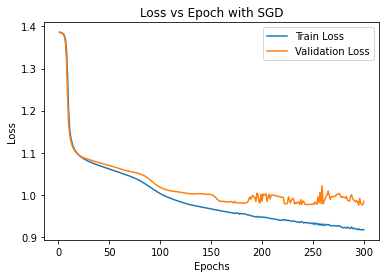

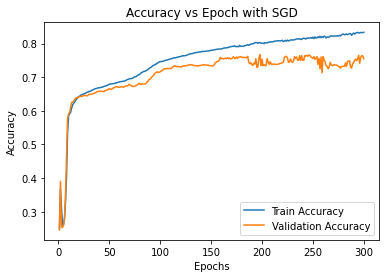

In [31]:

# plot losses vs epoch 
plt.figure(1)  
plt.plot(np.arange(1,301), tr_losses, np.arange(1,301), val_losses)
plt.title("Loss vs Epoch with SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

# plot losses vs epoch 
plt.figure(2)  
plt.plot(np.arange(1,301), tr_accuracies, np.arange(1,301), val_accuracies)
plt.title("Accuracy vs Epoch with SGD")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.show()


####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Mean Loss: 0.991862214654684 
Mean Acc: 0.7435 
Mean Macro Precision: 0.7440082905117317 
Mean Macro Recall: 0.7395644985304424 
Mean Macro F1 Score: 0.7417797392065252


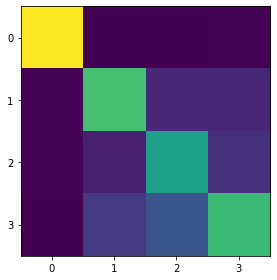

In [32]:
# Test CNN
# load best model
best_path = "best_cnn_sgd.pth"
model = torch.load(best_path).to(device)

#evaluate on test set
model = model.eval()
predictions = []
ground_truths=[]
losses = []
correct = 0
with torch.no_grad():
    for batch in test_loader:
        optimizer.zero_grad()
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        losses.append(loss.item())
        pred = y_pred.data.max(1, keepdim=True)[1].cpu()
        gt = y_batch.data.max(1, keepdim=True)[1].cpu()
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        pred = pred.reshape(len(pred))
        gt = gt.reshape(len(gt))
        predictions = np.concatenate((predictions, pred))
        ground_truths = np.concatenate((ground_truths, gt))
avg_loss = np.mean(losses)    
accuracy = (correct.item()/len(test_loader.dataset))
conf_matrix = confusion_matrix(predictions, ground_truths)  
#   calculate precision
p_0 = conf_matrix[0,0]/np.sum(conf_matrix[0,:])
p_1 = conf_matrix[1,1]/np.sum(conf_matrix[1,:])
p_2 = conf_matrix[2,2]/np.sum(conf_matrix[2,:])
p_3 = conf_matrix[3,3]/np.sum(conf_matrix[3,:])
mean_precision = (p_0 + p_1 + p_2 + p_3)/4
#   calculate recall
r_0 = conf_matrix[0,0]/np.sum(conf_matrix[:,0])
r_1 = conf_matrix[1,1]/np.sum(conf_matrix[:,1])
r_2 = conf_matrix[2,2]/np.sum(conf_matrix[:,2])
r_3 = conf_matrix[3,3]/np.sum(conf_matrix[:,3])
mean_recall = (r_0 + r_1 + r_2 + r_3)/4
#   calculate F1 score
f1 = (2*mean_precision*mean_recall)/(mean_precision+mean_recall)

# print metrics
print("Mean Loss:", avg_loss, "\nMean Acc:", accuracy, "\nMean Macro Precision:", mean_precision, "\nMean Macro Recall:", mean_recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [33]:
# HINT: note that your training time should not take more than 2 hours.

max_epoch = 300
train_batch = 128
test_batch = 128
learning_rate = 1e-04
  
best_path = "best_cnn_adam.pth"
# Create train dataset loader
train_loader = DataLoader(train_dataset, batch_size=train_batch)
# Create validation dataset loader
val_loader = DataLoader(val_dataset, batch_size=train_batch)
# Create test dataset loader
test_loader = DataLoader(test_dataset, batch_size=test_batch)
# initialize your network
model = ConvNet()
device = torch.device(dev)
model = model.to(device)
# define your loss function
criterion = nn.CrossEntropyLoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
tr_losses=[]
tr_accuracies=[]
val_losses=[]
val_accuracies=[]
i = 1
min_loss = np.inf
for epoch in range(max_epoch):
    model=model.train()
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    for batch in train_loader:
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()   
        pred = y_pred.data.max(1, keepdim=True)[1]
        gt = y_batch.data.max(1, keepdim=True)[1]
        #print("pred:", pred, ", gt:", gt)
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        epoch_losses.append(loss.item())
        optimizer.step()
    accuracy = (correct.item()/len(train_loader.dataset))
    tr_accuracies.append(accuracy)
    avg_loss = np.mean(epoch_losses)
    tr_losses.append(avg_loss)
    print(i,") Training: loss:", avg_loss, ", accuracy:", accuracy)
    i += 1

    #    Validation
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    model = model.eval()
    with torch.no_grad():
        for batch in val_loader:
            x_batch = batch[0].to(device)
            y_batch = batch[1].to(device)
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            pred = y_pred.data.max(1, keepdim=True)[1]
            gt = y_batch.data.max(1, keepdim=True)[1]
            #print("pred:", pred, ", gt:", gt)
            correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
            epoch_losses.append(loss.item())
        accuracy = (correct.item()/len(val_loader.dataset))
        val_accuracies.append(accuracy)    
        avg_loss = np.mean(epoch_losses)    
        val_losses.append(avg_loss)
        print("Validation: loss:", avg_loss, ", accuracy:", accuracy)
        if avg_loss < min_loss:
            torch.save(model, best_path)
            min_loss = avg_loss
            print("New min loss:", min_loss)


1 ) Training: loss: 1.383372471549294 , accuracy: 0.31314285714285717
Validation: loss: 1.372331514954567 , accuracy: 0.454
New min loss: 1.372331514954567
2 ) Training: loss: 1.316089601950212 , accuracy: 0.47885714285714287
Validation: loss: 1.2415637224912643 , accuracy: 0.545
New min loss: 1.2415637224912643
3 ) Training: loss: 1.1961022810502486 , accuracy: 0.5577142857142857
Validation: loss: 1.1728492081165314 , accuracy: 0.567
New min loss: 1.1728492081165314
4 ) Training: loss: 1.1537523052909158 , accuracy: 0.5845714285714285
Validation: loss: 1.1469388455152512 , accuracy: 0.604
New min loss: 1.1469388455152512
5 ) Training: loss: 1.1306741085919467 , accuracy: 0.6062857142857143
Validation: loss: 1.1280535459518433 , accuracy: 0.61
New min loss: 1.1280535459518433
6 ) Training: loss: 1.1153248505158857 , accuracy: 0.6227142857142857
Validation: loss: 1.1140808165073395 , accuracy: 0.628
New min loss: 1.1140808165073395
7 ) Training: loss: 1.1036024592139504 , accuracy: 0.63

54 ) Training: loss: 0.9869303627447649 , accuracy: 0.7611428571428571
Validation: loss: 1.0024849623441696 , accuracy: 0.742
New min loss: 1.0024849623441696
55 ) Training: loss: 0.9859269055453214 , accuracy: 0.7618571428571429
Validation: loss: 1.0017372816801071 , accuracy: 0.742
New min loss: 1.0017372816801071
56 ) Training: loss: 0.9849431590600447 , accuracy: 0.762
Validation: loss: 1.001023307442665 , accuracy: 0.742
New min loss: 1.001023307442665
57 ) Training: loss: 0.9839773318984292 , accuracy: 0.7627142857142857
Validation: loss: 1.0003342181444168 , accuracy: 0.742
New min loss: 1.0003342181444168
58 ) Training: loss: 0.9830341111529958 , accuracy: 0.7638571428571429
Validation: loss: 0.9996531680226326 , accuracy: 0.742
New min loss: 0.9996531680226326
59 ) Training: loss: 0.982101414420388 , accuracy: 0.7648571428571429
Validation: loss: 0.9989838749170303 , accuracy: 0.742
New min loss: 0.9989838749170303
60 ) Training: loss: 0.9811853733929721 , accuracy: 0.76628571

107 ) Training: loss: 0.9525607174093073 , accuracy: 0.7998571428571428
Validation: loss: 0.9790419712662697 , accuracy: 0.759
New min loss: 0.9790419712662697
108 ) Training: loss: 0.952106016332453 , accuracy: 0.8007142857142857
Validation: loss: 0.9787957966327667 , accuracy: 0.759
New min loss: 0.9787957966327667
109 ) Training: loss: 0.9516543886878274 , accuracy: 0.8011428571428572
Validation: loss: 0.9785592183470726 , accuracy: 0.759
New min loss: 0.9785592183470726
110 ) Training: loss: 0.9512063123963096 , accuracy: 0.8012857142857143
Validation: loss: 0.9783214628696442 , accuracy: 0.759
New min loss: 0.9783214628696442
111 ) Training: loss: 0.9507572271607139 , accuracy: 0.8022857142857143
Validation: loss: 0.9780960157513618 , accuracy: 0.759
New min loss: 0.9780960157513618
112 ) Training: loss: 0.950312864780426 , accuracy: 0.8031428571428572
Validation: loss: 0.9778709262609482 , accuracy: 0.761
New min loss: 0.9778709262609482
113 ) Training: loss: 0.9498731710694053 ,

160 ) Training: loss: 0.9316885980692777 , accuracy: 0.824
Validation: loss: 0.9708954244852066 , accuracy: 0.765
New min loss: 0.9708954244852066
161 ) Training: loss: 0.9313471772454002 , accuracy: 0.8245714285714286
Validation: loss: 0.970806211233139 , accuracy: 0.765
New min loss: 0.970806211233139
162 ) Training: loss: 0.9310096675699407 , accuracy: 0.8245714285714286
Validation: loss: 0.9707194417715073 , accuracy: 0.765
New min loss: 0.9707194417715073
163 ) Training: loss: 0.9306737498803572 , accuracy: 0.8247142857142857
Validation: loss: 0.9706321805715561 , accuracy: 0.766
New min loss: 0.9706321805715561
164 ) Training: loss: 0.9303383642976935 , accuracy: 0.825
Validation: loss: 0.9705461487174034 , accuracy: 0.765
New min loss: 0.9705461487174034
165 ) Training: loss: 0.930004912072962 , accuracy: 0.825
Validation: loss: 0.9704645946621895 , accuracy: 0.766
New min loss: 0.9704645946621895
166 ) Training: loss: 0.9296723983504556 , accuracy: 0.825
Validation: loss: 0.970

213 ) Training: loss: 0.9144751321185719 , accuracy: 0.8422857142857143
Validation: loss: 0.9656887501478195 , accuracy: 0.771
New min loss: 0.9656887501478195
214 ) Training: loss: 0.9141631776636298 , accuracy: 0.8425714285714285
Validation: loss: 0.9655907228589058 , accuracy: 0.771
New min loss: 0.9655907228589058
215 ) Training: loss: 0.9138513207435608 , accuracy: 0.8427142857142857
Validation: loss: 0.9654901102185249 , accuracy: 0.772
New min loss: 0.9654901102185249
216 ) Training: loss: 0.9135406765070828 , accuracy: 0.843
Validation: loss: 0.9653889238834381 , accuracy: 0.772
New min loss: 0.9653889238834381
217 ) Training: loss: 0.9132289561358365 , accuracy: 0.8435714285714285
Validation: loss: 0.9652896672487259 , accuracy: 0.772
New min loss: 0.9652896672487259
218 ) Training: loss: 0.9129167621785944 , accuracy: 0.844
Validation: loss: 0.9651839211583138 , accuracy: 0.772
New min loss: 0.9651839211583138
219 ) Training: loss: 0.9126063747839495 , accuracy: 0.84414285714

266 ) Training: loss: 0.8987254446203058 , accuracy: 0.8575714285714285
Validation: loss: 0.9628125131130219 , accuracy: 0.778
New min loss: 0.9628125131130219
267 ) Training: loss: 0.8984558170491999 , accuracy: 0.8578571428571429
Validation: loss: 0.9627813175320625 , accuracy: 0.778
New min loss: 0.9627813175320625
268 ) Training: loss: 0.8981888543475758 , accuracy: 0.8582857142857143
Validation: loss: 0.9627517387270927 , accuracy: 0.778
New min loss: 0.9627517387270927
269 ) Training: loss: 0.8979250929572365 , accuracy: 0.8587142857142858
Validation: loss: 0.962711326777935 , accuracy: 0.778
New min loss: 0.962711326777935
270 ) Training: loss: 0.897661665352908 , accuracy: 0.8588571428571429
Validation: loss: 0.9626639112830162 , accuracy: 0.777
New min loss: 0.9626639112830162
271 ) Training: loss: 0.8973999337716536 , accuracy: 0.859
Validation: loss: 0.9626071229577065 , accuracy: 0.778
New min loss: 0.9626071229577065
272 ) Training: loss: 0.897140028259971 , accuracy: 0.85

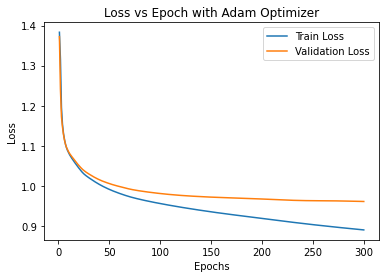

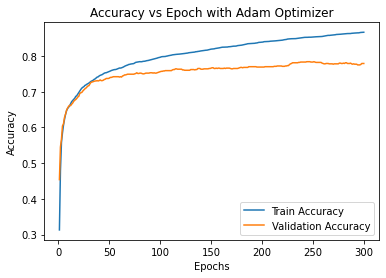

In [34]:
# plot losses vs epoch 
plt.figure(3)  
plt.plot(np.arange(1,301), tr_losses, np.arange(1,301), val_losses)
plt.title("Loss vs Epoch with Adam Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

# plot losses vs epoch 
plt.figure(4)  
plt.plot(np.arange(1,301), tr_accuracies, np.arange(1,301), val_accuracies)
plt.title("Accuracy vs Epoch with Adam Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.show()

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

  

Mean Loss: 0.9627442769706249 
Mean Acc: 0.7825 
Mean Macro Precision: 0.7791089425496789 
Mean Macro Recall: 0.7792082659947732 
Mean Macro F1 Score: 0.7791586011069056


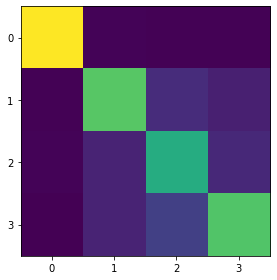

In [35]:
# Test CNN
# load best model
best_path = "best_cnn_adam.pth"
model = torch.load(best_path).to(device)

#evaluate on test set
model = model.eval()
predictions = []
ground_truths=[]
losses = []
correct = 0
with torch.no_grad():
    for batch in test_loader:
        optimizer.zero_grad()
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        losses.append(loss.item())
        pred = y_pred.data.max(1, keepdim=True)[1].cpu()
        gt = y_batch.data.max(1, keepdim=True)[1].cpu()
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        pred = pred.reshape(len(pred))
        gt = gt.reshape(len(gt))
        predictions = np.concatenate((predictions, pred))
        ground_truths = np.concatenate((ground_truths, gt))
avg_loss = np.mean(losses)    
accuracy = (correct.item()/len(test_loader.dataset))
conf_matrix = confusion_matrix(predictions, ground_truths)  
#   calculate precision
p_0 = conf_matrix[0,0]/np.sum(conf_matrix[0,:])
p_1 = conf_matrix[1,1]/np.sum(conf_matrix[1,:])
p_2 = conf_matrix[2,2]/np.sum(conf_matrix[2,:])
p_3 = conf_matrix[3,3]/np.sum(conf_matrix[3,:])
mean_precision = (p_0 + p_1 + p_2 + p_3)/4
#   calculate recall
r_0 = conf_matrix[0,0]/np.sum(conf_matrix[:,0])
r_1 = conf_matrix[1,1]/np.sum(conf_matrix[:,1])
r_2 = conf_matrix[2,2]/np.sum(conf_matrix[:,2])
r_3 = conf_matrix[3,3]/np.sum(conf_matrix[:,3])
mean_recall = (r_0 + r_1 + r_2 + r_3)/4
#   calculate F1 score
f1 = (2*mean_precision*mean_recall)/(mean_precision+mean_recall)

# print metrics
print("Mean Loss:", avg_loss, "\nMean Acc:", accuracy, "\nMean Macro Precision:", mean_precision, "\nMean Macro Recall:", mean_recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

# Explanation

As expected, Adam optimizer produced a better result than SGD. The result is better in terms of training accuracy and also in terms of the training and validation accuracy plots, which have more fluctuations for SGD and less for Adam. For learning rates less than 1e-02, SGD had problem with converging and the accuracy was poor. However, Adam worked quite well with the learning rate 1e-02. The algorithm complexity is linearly dependent to (number_of_epochs * dataset_size) since it goes over the entire dataset in each epoch. In general, the results show that Adam is more preferable than SGD due to its better accuracy and more stable behavior. The model with Adam also converges more quickly, which is another advantage of Adam over SGD. 

###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [36]:
# HINT: note that your training time should not take more than 2 hours.
best_path = "best_cnn_transfer.pth"
# TODO:
# Pick your hyper parameters
max_epoch = 20
train_batch = 128
test_batch = 128 
learning_rate = 1e-02 # try learning rate from the interval [1e-1, 1e-4]

#use_gpu = torch.cuda.is_available()


# Create train dataset loader
train_loader = DataLoader(train_dataset, batch_size=train_batch)
# Create validation dataset loader
val_loader = DataLoader(val_dataset, batch_size=train_batch)
# Create test dataset loader
test_loader = DataLoader(test_dataset, batch_size=test_batch)

# initialize your network
device = torch.device(dev)
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(512, 4)
model = model.to(device)

# define your loss function
criterion = nn.CrossEntropyLoss() 
    
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 5e-04) # you can play with momentum and weight_decay parameters as well
    
tr_losses=[]
tr_accuracies=[]
val_losses=[]
val_accuracies=[]
i = 1
min_loss = np.inf
for epoch in range(max_epoch):
    model=model.train()
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    for batch in train_loader:
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()   
        pred = y_pred.data.max(1, keepdim=True)[1]
        gt = y_batch.data.max(1, keepdim=True)[1]
        #print("pred:", pred, ", gt:", gt)
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        epoch_losses.append(loss.item())
        optimizer.step()
    accuracy = (correct.item()/len(train_loader.dataset))
    tr_accuracies.append(accuracy)
    avg_loss = np.mean(epoch_losses)
    tr_losses.append(avg_loss)
    print(i,") Training: loss:", avg_loss, ", accuracy:", accuracy)
    i += 1

    #    Validation
    epoch_losses = []
    epoch_accuracies = []
    correct = 0
    model = model.eval()
    with torch.no_grad():
        for batch in val_loader:
            x_batch = batch[0].to(device)
            y_batch = batch[1].to(device)
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            pred = y_pred.data.max(1, keepdim=True)[1]
            gt = y_batch.data.max(1, keepdim=True)[1]
            #print("pred:", pred, ", gt:", gt)
            correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
            epoch_losses.append(loss.item())
        accuracy = (correct.item()/len(val_loader.dataset))
        val_accuracies.append(accuracy)    
        avg_loss = np.mean(epoch_losses)    
        val_losses.append(avg_loss)
        print("Validation: loss:", avg_loss, ", accuracy:", accuracy)
        if avg_loss < min_loss:
            torch.save(model, best_path)
            min_loss = avg_loss
            print("New min loss:", min_loss)



1 ) Training: loss: 0.7109111401167783 , accuracy: 0.7268571428571429
Validation: loss: 0.43682392686605453 , accuracy: 0.849
New min loss: 0.43682392686605453
2 ) Training: loss: 0.3111611420458013 , accuracy: 0.8938571428571429
Validation: loss: 0.35846032947301865 , accuracy: 0.872
New min loss: 0.35846032947301865
3 ) Training: loss: 0.19330512596802277 , accuracy: 0.9412857142857143
Validation: loss: 0.33855678141117096 , accuracy: 0.888
New min loss: 0.33855678141117096
4 ) Training: loss: 0.12411133484406904 , accuracy: 0.9695714285714285
Validation: loss: 0.33521027863025665 , accuracy: 0.891
New min loss: 0.33521027863025665
5 ) Training: loss: 0.08125197867100889 , accuracy: 0.9861428571428571
Validation: loss: 0.3402869217097759 , accuracy: 0.891
6 ) Training: loss: 0.05465534752742811 , accuracy: 0.9931428571428571
Validation: loss: 0.348627295345068 , accuracy: 0.891
7 ) Training: loss: 0.03836322186345404 , accuracy: 0.9964285714285714
Validation: loss: 0.3555653654038906

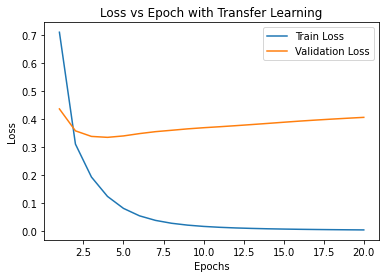

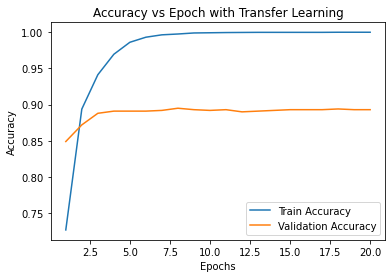

In [37]:
# plot losses vs epoch 
plt.figure(5)  
plt.plot(np.arange(1,21), tr_losses, np.arange(1,21), val_losses)
plt.title("Loss vs Epoch with Transfer Learning")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

# plot losses vs epoch 
plt.figure(6)  
plt.plot(np.arange(1,21), tr_accuracies, np.arange(1,21), val_accuracies)
plt.title("Accuracy vs Epoch with Transfer Learning")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.show()

####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Mean Loss: 0.33951204270124435 
Mean Acc: 0.8855 
Mean Macro Precision: 0.8845995156762574 
Mean Macro Recall: 0.8837439154773581 
Mean Macro F1 Score: 0.8841715085888191


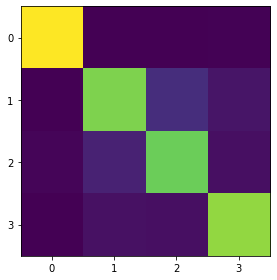

In [39]:
# Test CNN
# load best model
best_path = "best_cnn_transfer.pth"
model = torch.load(best_path).to(device)

#evaluate on test set
model = model.eval()
predictions = []
ground_truths=[]
losses = []
correct = 0
with torch.no_grad():
    for batch in test_loader:
        optimizer.zero_grad()
        x_batch = batch[0].to(device)
        y_batch = batch[1].to(device)
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        losses.append(loss.item())
        pred = y_pred.data.max(1, keepdim=True)[1].cpu()
        gt = y_batch.data.max(1, keepdim=True)[1].cpu()
        correct += pred.eq(gt.data.view_as(pred)).cpu().sum()
        pred = pred.reshape(len(pred))
        gt = gt.reshape(len(gt))
        predictions = np.concatenate((predictions, pred))
        ground_truths = np.concatenate((ground_truths, gt))
avg_loss = np.mean(losses)    
accuracy = (correct.item()/len(test_loader.dataset))
conf_matrix = confusion_matrix(predictions, ground_truths)  
#   calculate precision
p_0 = conf_matrix[0,0]/np.sum(conf_matrix[0,:])
p_1 = conf_matrix[1,1]/np.sum(conf_matrix[1,:])
p_2 = conf_matrix[2,2]/np.sum(conf_matrix[2,:])
p_3 = conf_matrix[3,3]/np.sum(conf_matrix[3,:])
mean_precision = (p_0 + p_1 + p_2 + p_3)/4
#   calculate recall
r_0 = conf_matrix[0,0]/np.sum(conf_matrix[:,0])
r_1 = conf_matrix[1,1]/np.sum(conf_matrix[:,1])
r_2 = conf_matrix[2,2]/np.sum(conf_matrix[:,2])
r_3 = conf_matrix[3,3]/np.sum(conf_matrix[:,3])
mean_recall = (r_0 + r_1 + r_2 + r_3)/4
#   calculate F1 score
f1 = (2*mean_precision*mean_recall)/(mean_precision+mean_recall)

# print metrics
print("Mean Loss:", avg_loss, "\nMean Acc:", accuracy, "\nMean Macro Precision:", mean_precision, "\nMean Macro Recall:", mean_recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

# Explanation

Like the previous algorithms, the algorithm is linearly dependent on (number_of_epochs * dataset_size) since it goes over the entire dataset in each epoch. The pretrained model produced a better accuracy compared to the models built from scratch, even though it uses much less epochs compared to them. The accuracy was around 0.74-0.78 for the other models and around 0.89 for the pretrained model. The pretrained model also produced a smoother graph, especially compared to the model with SGD which had fluctuations. The loss is also much less for this model compared to the previous models. The model converged more quickly because its weights were already optimized, which is an advantage of pretrained model over the other models that were built from scratch.